<a href="https://colab.research.google.com/github/wamaithakamande/hypothesis/blob/main/PROJECT_2_Hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT

We have been tasked to understand electric car usag. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

#column defination



*   Postal Code- postal code of the area (in Paris)
*   Dates -date of the row aggregation
*   n_daily_data_points-number of daily data poinst that were available for aggregation, that day
*  .dayOfWeek- identifier of weekday (0: Monday -> 6: Sunday)
*    data_type-weekday or weekend
* BlueCars_taken_sum-Number of bluecars taken that date in that area
*   BlueCars_returned_sum- Number of bluecars returned that date in that area
*   utilib_taken_sum - Number of Utilib taken that date in that area
1.   Utilib_returned_sum-Number of Utilib returned that date in that area
2.  Utilib_14_taken_sum -Number of Utilib 1.4 taken that date in that area
* Utilib_14_returned-Number of Utilib 1.4 returned that date in that area
*   slots_freed_sum- Number of recharging slots released that date in that area

1.   slots_taken_sum- Number of rechargign slots taken that date in that area
















In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

#loading data
Autolib = pd.read_csv('/content/autolib_daily_events_postal_code (1).csv')
Autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
Autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# checking the data
Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
Autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
#checking null values
Autolib.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
#checking the mean of the dataset
Autolib.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Postal code               88791.293876
n_daily_data_points        1431.330619
dayOfWeek                     2.969599
BlueCars_taken_sum          125.926951
BlueCars_returned_sum       125.912714
Utilib_taken_sum              3.698290
Utilib_returned_sum           3.699099
Utilib_14_taken_sum           8.600560
Utilib_14_returned_sum        8.599192
Slots_freed_sum              22.629033
Slots_taken_sum              22.629282
dtype: float64

In [ ]:
#checking the standard deviation of the data set
Autolib.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Postal code               7647.342000
n_daily_data_points         33.212050
dayOfWeek                    2.008378
BlueCars_taken_sum         185.426579
BlueCars_returned_sum      185.501535
Utilib_taken_sum             5.815058
Utilib_returned_sum          5.824634
Utilib_14_taken_sum         12.870098
Utilib_14_returned_sum      12.868993
Slots_freed_sum             52.120263
Slots_taken_sum             52.146030
dtype: float64

In [ ]:
#checking the mode
Autolib.mode()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/24/2018,1440.0,0.0,weekday,12.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
1,75002,1/25/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75003,1/27/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75004,1/28/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75005,1/29/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,94700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,94800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,95100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,95870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Univariate Analysis

Text(0.5, 1.0, 'Postal code')

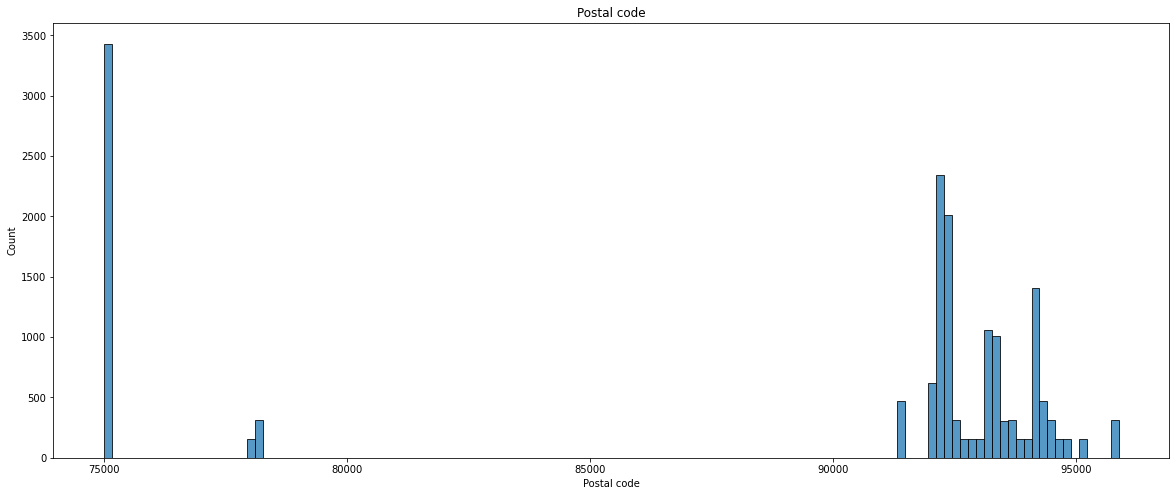

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.histplot(Autolib, x='Postal code')
ax.set_title('Postal code')

Postal code 75000, had the highest number of bluecar users who went for the car servicing

Text(0.5, 1.0, 'Day of week')

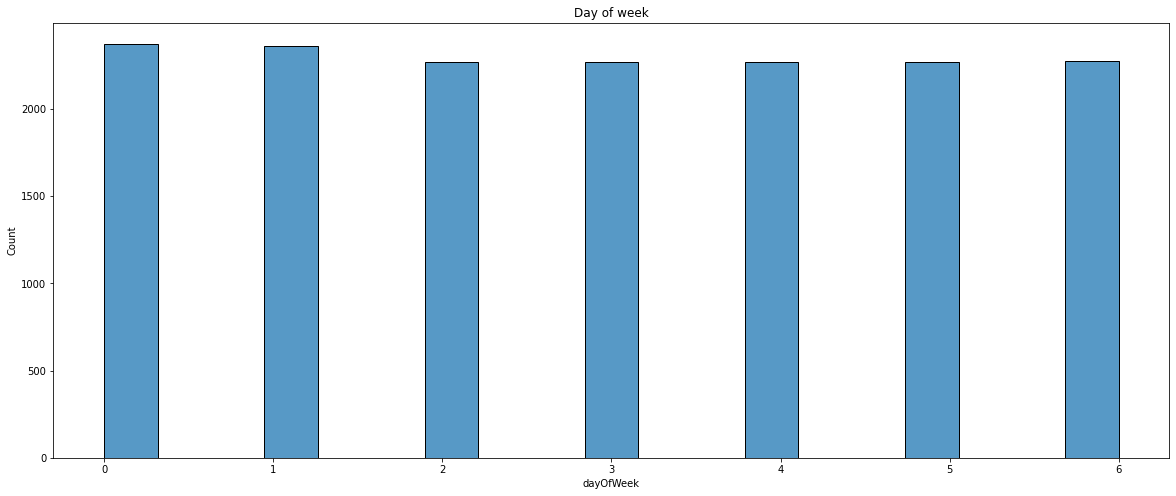

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.histplot(Autolib, x='dayOfWeek')
ax.set_title('Day of week')

Most had an slightly equal demand for the servicing

Text(0.5, 1.0, 'Blue Cars Taken')

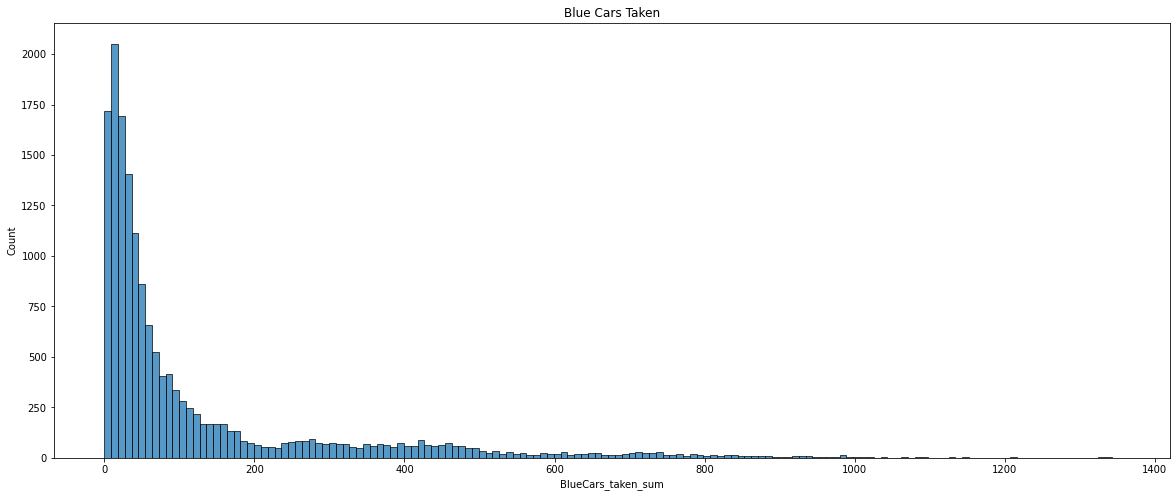

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.histplot(Autolib, x='BlueCars_taken_sum')
ax.set_title('Blue Cars Taken')

Blue cars had a fairly high demand in the beggining of the year and dropped drastically after the first  few weeks in the  month and that was thend up until sixth month

Text(0.5, 1.0, 'Blue Cars return')

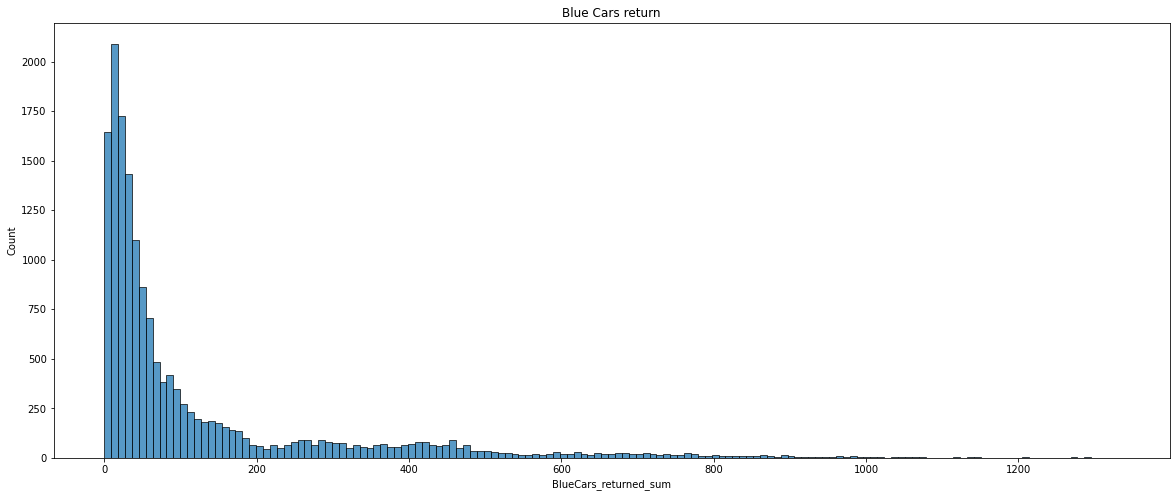

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.histplot(Autolib, x='BlueCars_returned_sum')
ax.set_title('Blue Cars return')

The number of cars that had been returned for servicing was almost equal to the number of cars taken

Text(0.5, 1.0, 'Utilib taken')

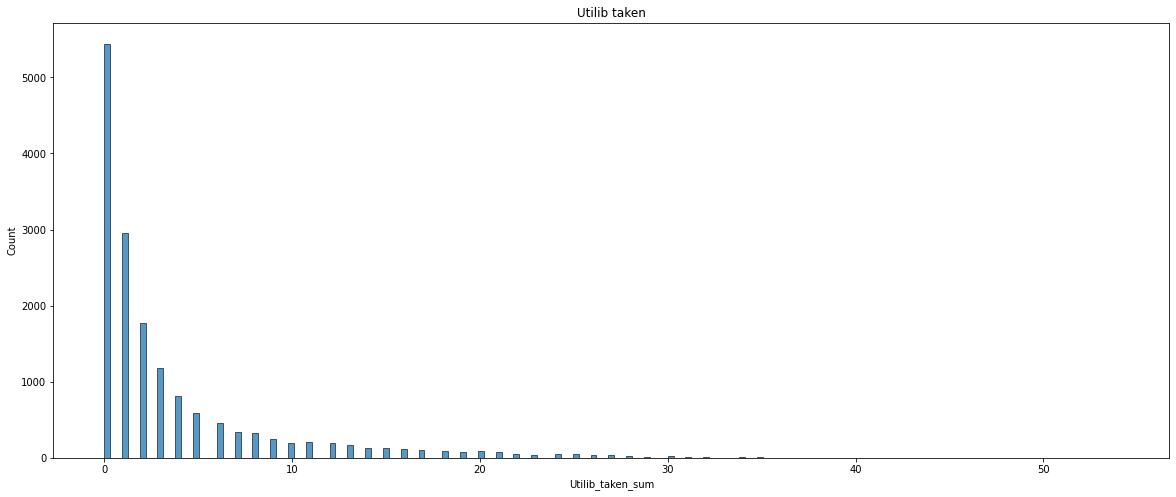

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.histplot(Autolib, x='Utilib_taken_sum')
ax.set_title('Utilib taken')

The utilib taken was higher at the start of the year but dropped drastically in the first few weeks

Text(0.5, 1.0, 'Utilib returned')

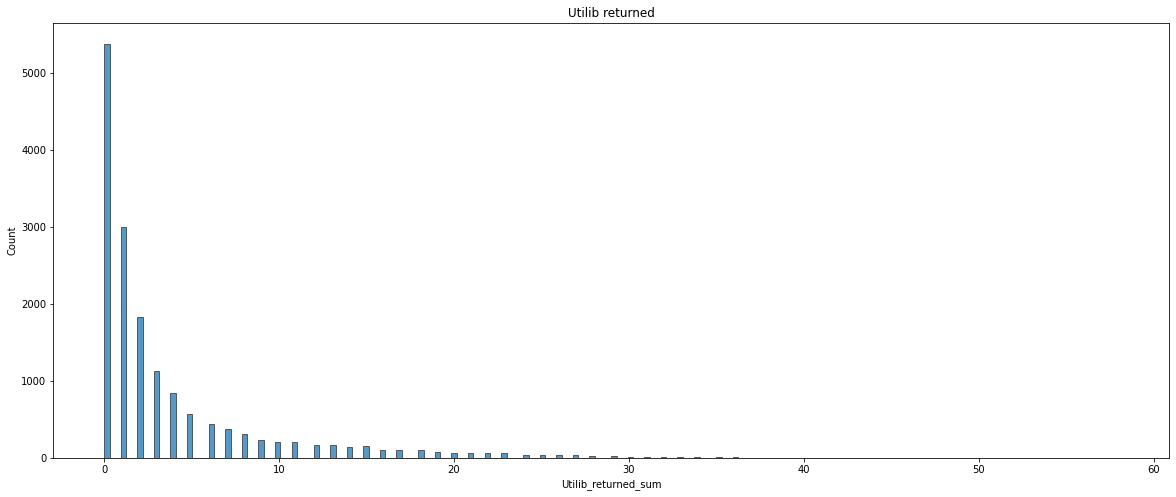

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.histplot(Autolib, x='Utilib_returned_sum')
ax.set_title('Utilib returned')

Utilib returned was almost equal to utilib taken for the same period

Text(0.5, 1.0, 'Utilib 14 taken sum')

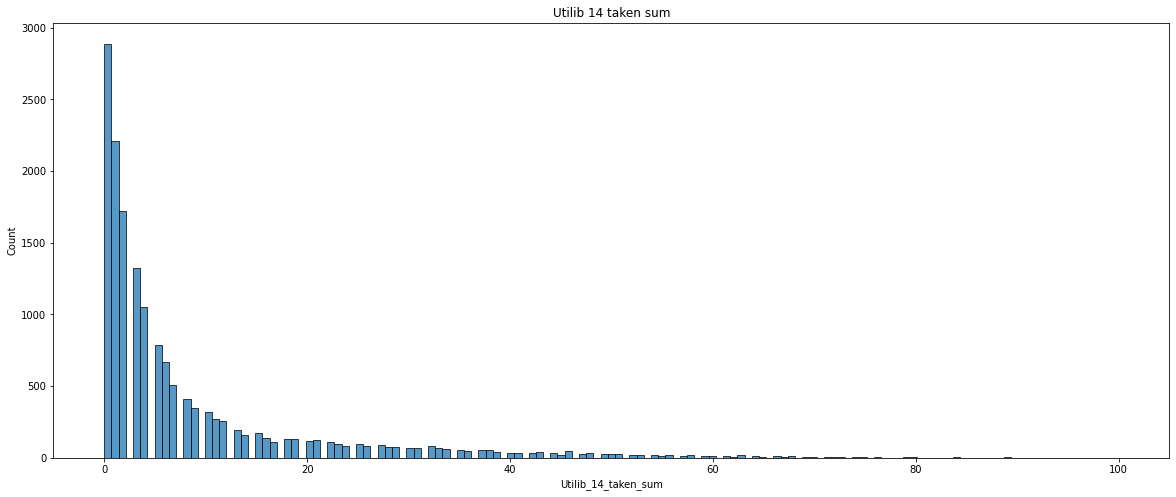

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.histplot(Autolib, x='Utilib_14_taken_sum')
ax.set_title('Utilib 14 taken sum')

Utilib 14 taken was higher in the first weeks and dropped drastically going foorward

Text(0.5, 1.0, 'Utilib_14_returned_sum')

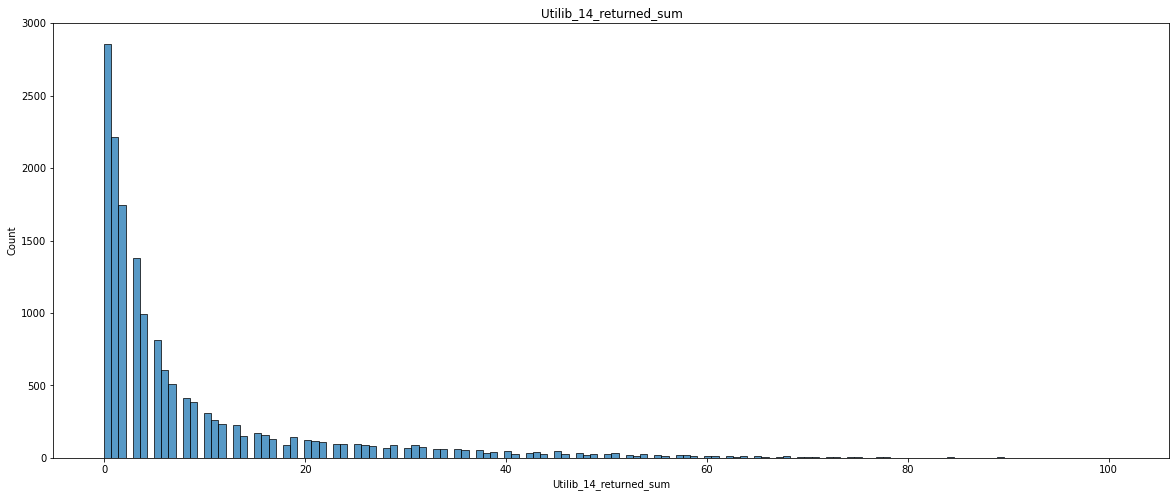

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.histplot(Autolib, x='Utilib_14_returned_sum')
ax.set_title('Utilib_14_returned_sum')

Utilib 14 returned was higher and dropped drastically in a few weeks

Text(0.5, 1.0, 'Slots freed sum')

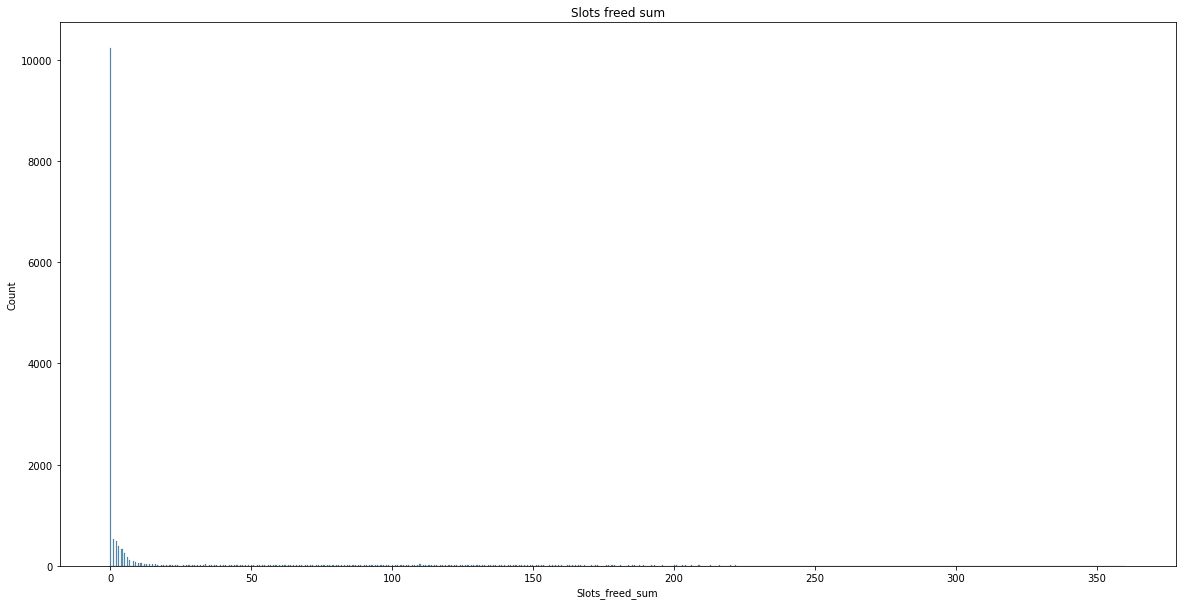

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.histplot(Autolib, x='Slots_freed_sum')
ax.set_title('Slots freed sum')

Servicing slot freed in the beggining was high in the begining and dropped as time went by

Text(0.5, 1.0, 'Slots taken sum')

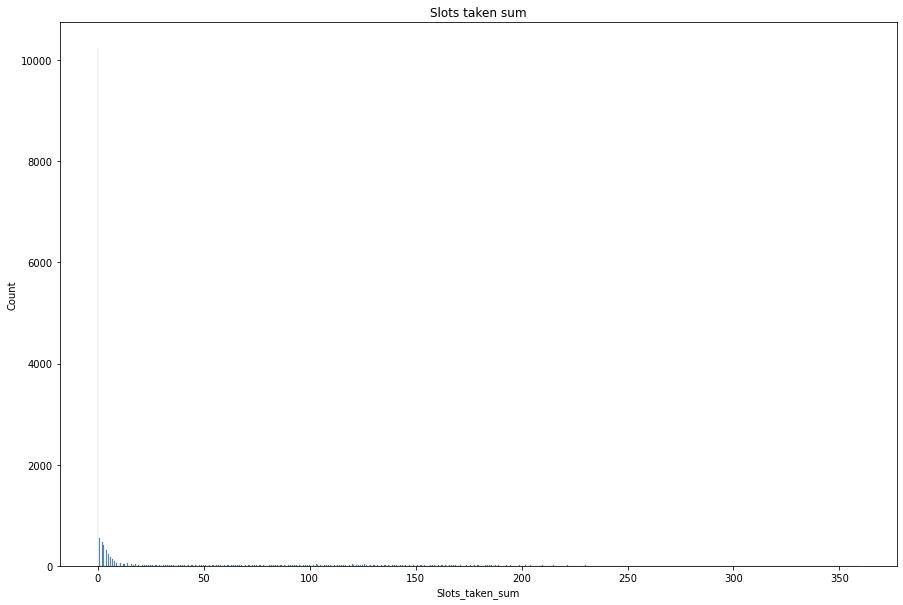

In [66]:
plt.figure(figsize=(15,10))
ax = sns.histplot(Autolib, x='Slots_taken_sum')
ax.set_title('Slots taken sum')

Slots taken were higher in the start and dropped as time progressed

#Bivariate Analysis

Comparion of blue cars taken and different variables

Text(0.5, 1.0, ' Postal code ')

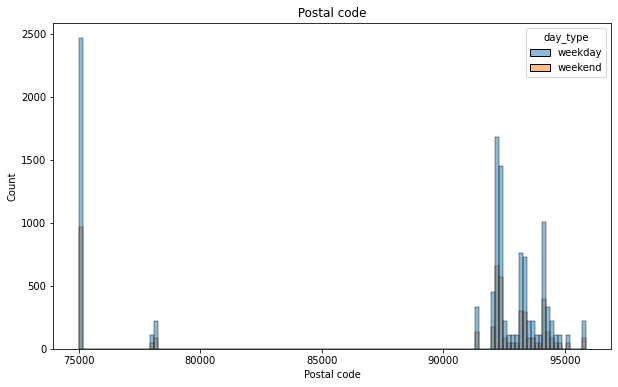

In [86]:
plt.figure(figsize=(10,6))
ax = sns.histplot(data=Autolib, x='Postal code', hue = 'day_type')
ax.set_title(' Postal code ')

Text(0.5, 1.0, ' Day of yhe week ')

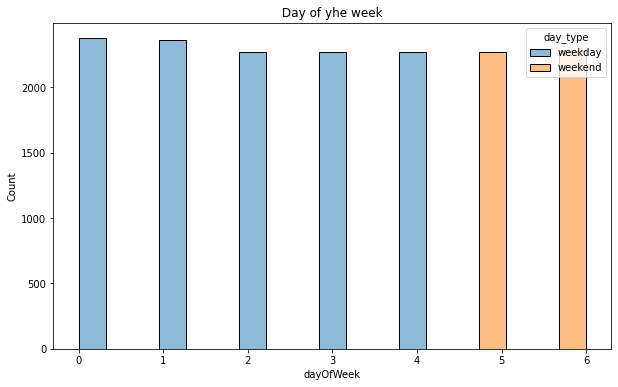

In [88]:
plt.figure(figsize=(10,6))
ax = sns.histplot(data=Autolib, x='dayOfWeek', hue = 'day_type')
ax.set_title(' Day of yhe week ')

Text(0.5, 1.0, ' Blue cars taken ')

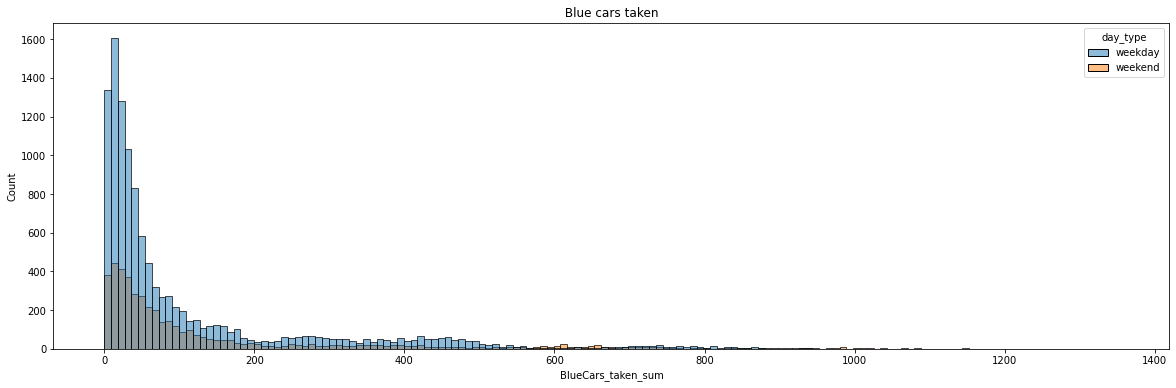

In [92]:
plt.figure(figsize=(20,6))
ax = sns.histplot(data=Autolib, x='BlueCars_taken_sum', hue = 'day_type')
ax.set_title(' Blue cars taken ')

Most cars blue car taken on weekdays

Text(0.5, 1.0, ' Blue cars returned ')

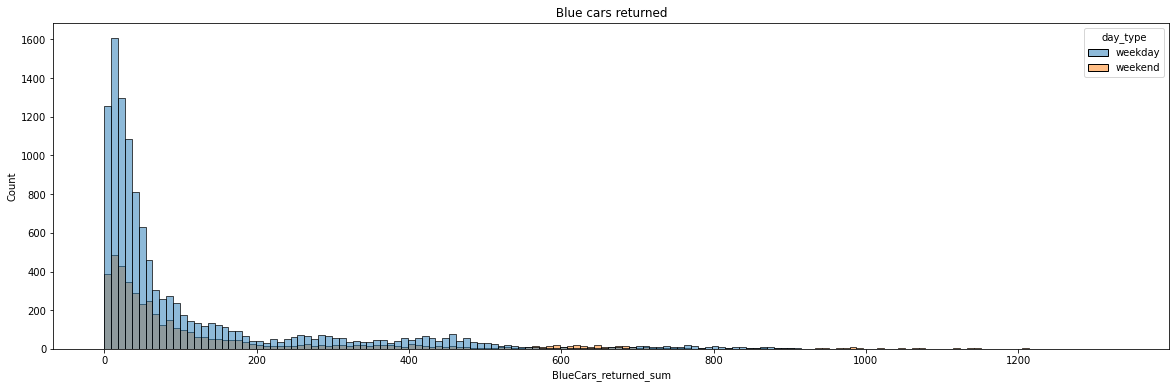

In [93]:
plt.figure(figsize=(20,6))
ax = sns.histplot(data=Autolib, x='BlueCars_returned_sum', hue = 'day_type')
ax.set_title(' Blue cars returned ')

Most Cars returned on weekdays

Text(0.5, 1.0, ' Utilib taken ')

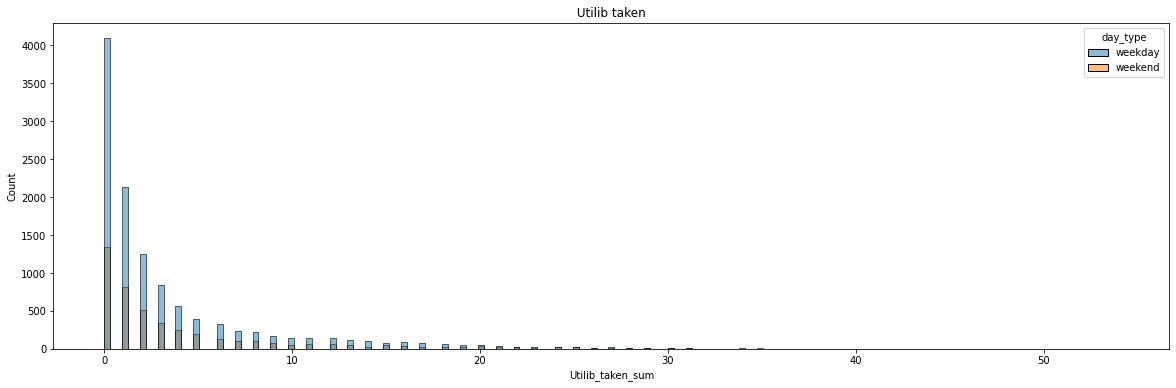

In [95]:
plt.figure(figsize=(20,6))
ax = sns.histplot(data=Autolib, x='Utilib_taken_sum', hue = 'day_type')
ax.set_title(' Utilib taken ')

Text(0.5, 1.0, ' Utilib returned ')

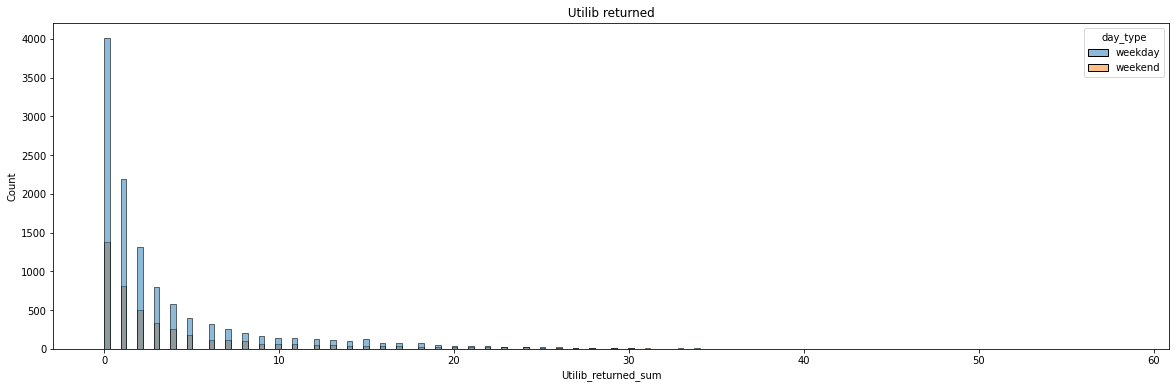

In [96]:
plt.figure(figsize=(20,6))
ax = sns.histplot(data=Autolib, x='Utilib_returned_sum', hue = 'day_type')
ax.set_title(' Utilib returned ')

Weekdays were the most active days at the start of the year

Text(0.5, 1.0, ' Utilib  14 taken ')

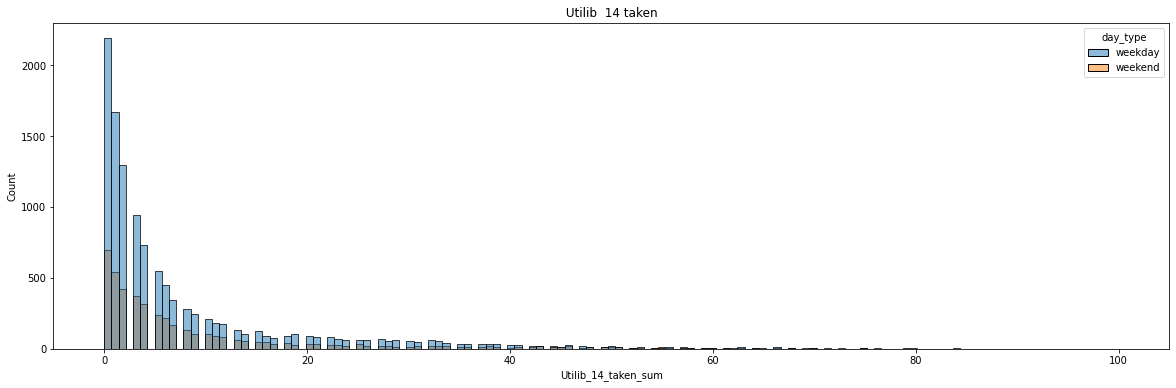

In [97]:
plt.figure(figsize=(20,6))
ax = sns.histplot(data=Autolib, x='Utilib_14_taken_sum', hue = 'day_type')
ax.set_title(' Utilib  14 taken ')

Text(0.5, 1.0, ' Utilib  14 returned ')

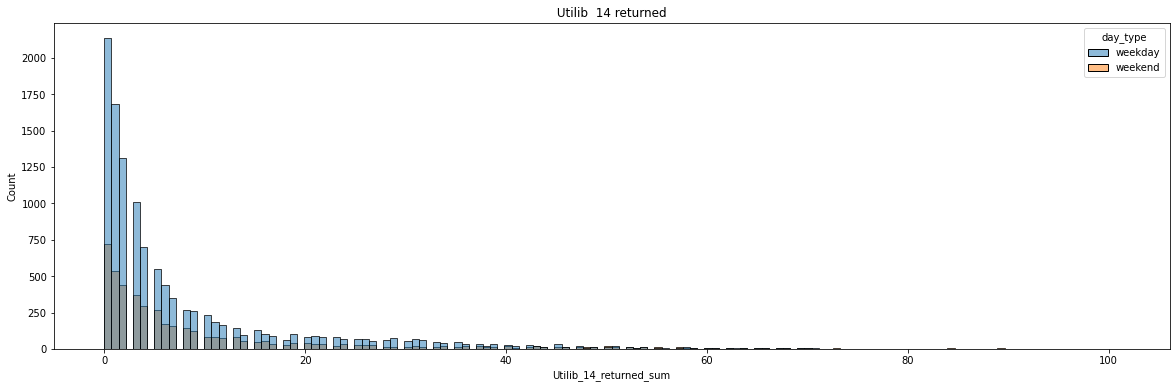

In [98]:
plt.figure(figsize=(20,6))
ax = sns.histplot(data=Autolib, x='Utilib_14_returned_sum', hue = 'day_type')
ax.set_title(' Utilib  14 returned ')

Weekdays were the most active

Text(0.5, 1.0, ' Slots Freec ')

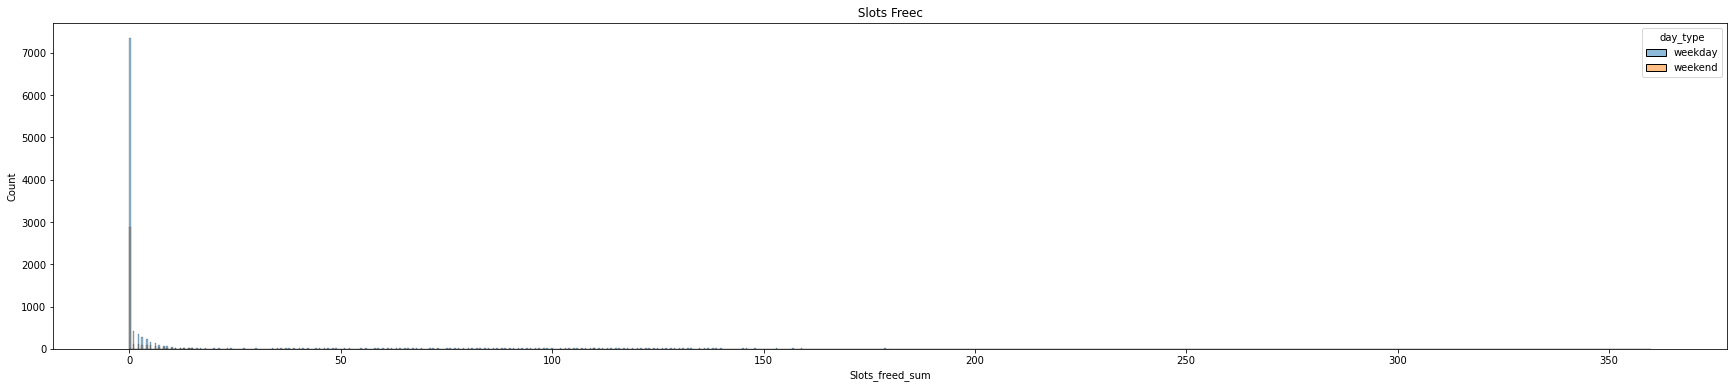

In [101]:
plt.figure(figsize=(30,6))
ax = sns.histplot(data=Autolib, x='Slots_freed_sum', hue = 'day_type')
ax.set_title(' Slots Freec ')

Text(0.5, 1.0, ' Slots taken ')

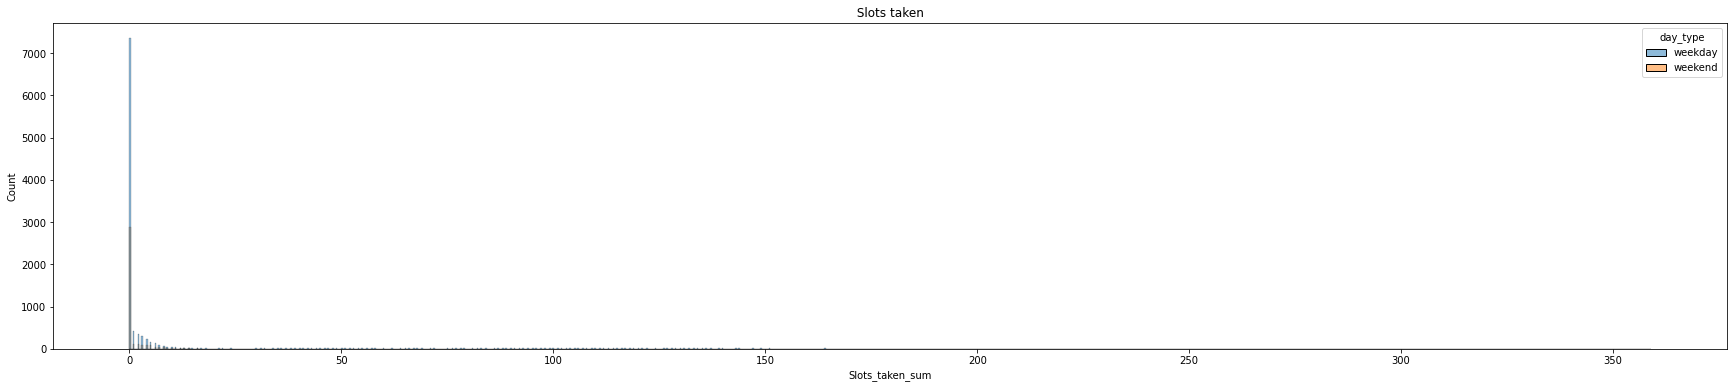

In [102]:
plt.figure(figsize=(30,6))
ax = sns.histplot(data=Autolib, x='Slots_taken_sum', hue = 'day_type')
ax.set_title(' Slots taken ')

Most slots were taken and freed on weekdays

#Hypothesis testing

Ho: the number of bluecars taken on weekdays is equal to weekends =

H1: the number of blue cars taken on weekdays is greater than weekends ≠ 

In [104]:
# want to group our data
pd.crosstab(Autolib.day_type,Autolib.BlueCars_taken_sum.sum())

col_0,2025535
day_type,
weekday,11544
weekend,4541


In [114]:
day_mean = Autolib.groupby('day_type').mean()
day_mean

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
day_type,,,,,,,,,,,
weekday,88789.959286,1430.007277,1.973926,116.028673,115.639380,3.424983,3.417620,7.999047,7.975485,20.945166,20.921431
weekend,88794.686633,1434.694781,5.500771,151.090068,152.029289,4.393085,4.414666,10.129707,10.184761,26.909712,26.970932


In [118]:
Day_1 =Autolib[Autolib['day_type']=='weekday'].sample(4500)
Day_2 = Autolib[Autolib['day_type']=='weekend'].sample(4500)
Day_2.sample(20)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
12062,93400,1/27/2018,1440,5,weekend,156,163,6,5,13,12,0,0
1244,75008,6/16/2018,1440,5,weekend,414,419,9,10,26,27,126,123
3607,78140,1/21/2018,1440,6,weekend,22,25,1,0,5,3,0,0
2725,75018,3/18/2018,1440,6,weekend,546,568,17,19,41,36,153,152
13015,94000,2/18/2018,1438,6,weekend,164,166,7,6,17,16,0,0
7065,92270,2/18/2018,1438,6,weekend,36,32,3,1,3,5,0,0
4595,92100,3/18/2018,1440,6,weekend,343,360,6,5,21,22,14,15
509,75004,2/11/2018,1440,6,weekend,247,254,0,1,15,15,65,64
13068,94000,4/15/2018,1439,6,weekend,119,112,0,1,9,10,0,0
11958,93390,1/7/2018,1440,6,weekend,4,6,0,0,0,0,0,0


#WE USE Z TEST SINCE SAMPLE IS GREATER THAN 30

In [138]:
#Loop hypothesis test across all columns

for column in Autolib.columns[:13]:
  ztest ,pval = stests.ztest(Day_1[column], x2= Day_2[column], value=0, alternative='two-sided')
  print("p-value is:", pval)
  if pval<0.05:
        print("for", column, "Since the p-value is <5%, we reject the null hypothesis")
  else:
        print("for", column, "Since the p-value is >5%, we fail to reject the null hypothesis")

p-value is: 0.8749288377434882
for Postal code Since the p-value is >5%, we fail to reject the null hypothesis


TypeError: ignored

#conclusion

Since the p value is 0.8749288377434882
we reject the null hypothesis.